<a href="https://colab.research.google.com/github/tahani319/DS_ML_HousePrices/blob/main/DS_ML_HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 02/12/2020 

###DS_ML_HousePrice  

#### data from: https://www.kaggle.com/shree1992/housedata
####the data contains information  about houses in USA 
####it contains 18 variables and 4600 observation.
####my main goal is to building a model to predict the price of a house 
####based on specific features of the house using different algorithim i have learned.

##EDA

#####so i start with EDA to understand my data :

load packages:

In [124]:

# Helper packages
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle
import math
import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline
# Modeling preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

# Modeling and resampling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

 


data

In [125]:
house = pd.read_csv('data.csv') 


Explore data : 

In [126]:
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [127]:
house.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [128]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [129]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

change statezip into factor

In [130]:
 #change statezip into factor  

house['statezip'] = house['statezip'].astype('category')

change bedrooms, bathrooms into integers

In [131]:
house['bedrooms'] = house['bedrooms'].astype('int64') #change bedrooms, bathrooms into integers
house['bathrooms'] = house['bathrooms'].astype('int64')

In [132]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           4600 non-null   object  
 1   price          4600 non-null   float64 
 2   bedrooms       4600 non-null   int64   
 3   bathrooms      4600 non-null   int64   
 4   sqft_living    4600 non-null   int64   
 5   sqft_lot       4600 non-null   int64   
 6   floors         4600 non-null   float64 
 7   waterfront     4600 non-null   int64   
 8   view           4600 non-null   int64   
 9   condition      4600 non-null   int64   
 10  sqft_above     4600 non-null   int64   
 11  sqft_basement  4600 non-null   int64   
 12  yr_built       4600 non-null   int64   
 13  yr_renovated   4600 non-null   int64   
 14  street         4600 non-null   object  
 15  city           4600 non-null   object  
 16  statezip       4600 non-null   category
 17  country        4600 non-null   ob

to see the count of country in dataset 

In [133]:
house.country.value_counts() #to see the count of country in dataset

USA    4600
Name: country, dtype: int64

to see how many city in dataset 

In [134]:
house.city.value_counts() #to see how many city in dataset



Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Newcastle                33
Bothell                  33
Vashon                   29
Tukwila                  29
SeaTac                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Fall City                11
Clyde Hill               11
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific             

In [135]:
house.statezip.value_counts()


WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

since I have statezip I do not need to city and street columns
also i deleted contry and date columns because they do not neccessary 

In [136]:
house.drop(['date','street', 'city', 'country'], axis = 1, inplace = True) #drop columns of data, street, city, country because they aren't neccessary here 

In [137]:
house.head() #to see data head after drop columns

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,313000.0,3,1,1340,7912,1.5,0,0,3,1340,0,1955,2005,WA 98133
1,2384000.0,5,2,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
2,342000.0,3,2,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042
3,420000.0,3,2,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008
4,550000.0,4,2,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052


see the min and max price values in data 

In [138]:
house.price.value_counts() #count values of price column 

0.0         49
300000.0    42
400000.0    31
450000.0    29
600000.0    29
            ..
586500.0     1
693000.0     1
226500.0     1
257200.0     1
256000.0     1
Name: price, Length: 1741, dtype: int64

 the data have 49 values of price is 0. 

In [139]:
house.bedrooms.value_counts() #count values of bedrooms column

3    2032
4    1531
2     566
5     353
6      61
1      38
7      14
8       2
0       2
9       1
Name: bedrooms, dtype: int64

In [140]:
house.bathrooms.value_counts() #count values of bathrooms column 

2    2311
1    1666
3     502
4      82
0      19
5      15
6       4
8       1
Name: bathrooms, dtype: int64

floors

In [141]:
house.floors.value_counts() #count values of floors column 

1.0    2174
2.0    1811
1.5     444
3.0     128
2.5      41
3.5       2
Name: floors, dtype: int64

view 

In [142]:
house.view.value_counts() #count values of view column 

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

the view column have 4140 values is 0 

waterfront

In [143]:
house.waterfront.value_counts() #count values of waterfront column 

0    4567
1      33
Name: waterfront, dtype: int64

the waterfront column have 4567 values is 0 

**correlation:**

In [144]:
frame_for_matrix = house[[ 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']]  #make data fram for correlation 

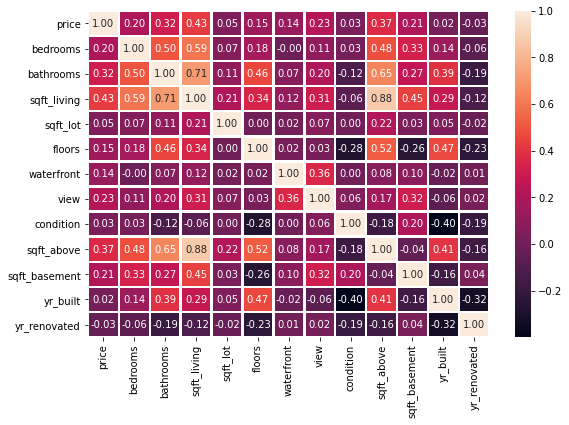

In [145]:
corr = frame_for_matrix.corr() 

f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(corr,annot=True,linewidths=1.5,fmt='.2f',ax=ax)
plt.show()  #correlation visualization 

notes : 

 

*   the price and amount of sqft_living are correlated, if size of sqft_living increase prices also increase 

* the sqft living and sqft above are 
highly correlated 0.88

* 





**show the outliers using plotbox:**

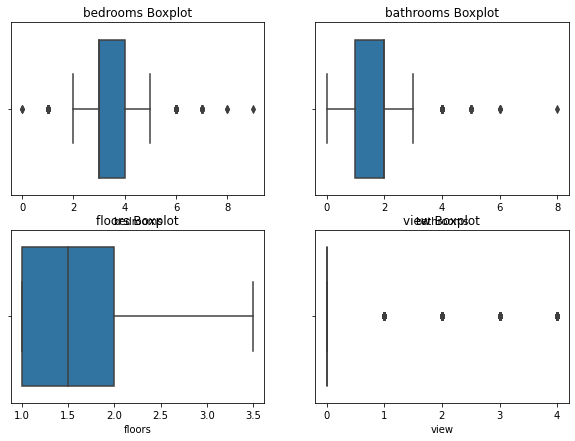

In [146]:
plt.figure(figsize=(10, 7)) #to see outliers in dataset 
plt.subplot(2,2,1)
sns.boxplot(x = 'bedrooms', data = house).set_title('bedrooms Boxplot')
plt.subplot(2,2,2)
sns.boxplot(x = 'bathrooms', data = house).set_title('bathrooms Boxplot')
plt.subplot(2,2,3)
sns.boxplot(x = 'floors', data = house).set_title('floors Boxplot')
plt.subplot(2,2,4)
sns.boxplot(x = 'view',  data = house).set_title('view Boxplot')


plt.show()

it seems that we have outliers in data 

##**Machine learning:**

the main goal is to predict house price using some of machine learning algorthim i have learned 

**Feature Enginnering**:

* missing valuse
* replace 0 values with means 
* scalling features
* normalize data 
* Processing categorical features 

**see the distribution of target varibale:**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


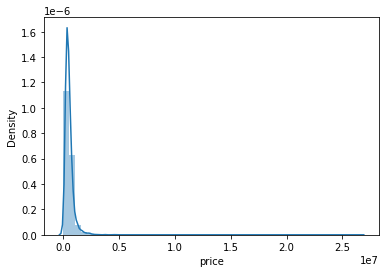

In [173]:
sns.distplot(house['price']) #viualize distribution of price 

it is obvious that price is positively skewed. 

**Missing values:**

check if the data has missing values 

In [148]:
house.isnull().sum() #check if data has missing values 

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
statezip         0
dtype: int64

the data has no missing values.

**replace 0 value in price with means:**

replace 0 values in price with means 

In [149]:
nonzero_mean = house[ house.price != 0 ].mean()  #replace 0 values in price with means

In [150]:
house.loc[ house.price == 0, "price" ] = nonzero_mean()

TypeError: ignored

In [ ]:
print(nonzero_mean)

In [ ]:
house.describe()

**Feature reduction**:


 sqft_living is heighly correlated with sqft_above 
 so i am going to remove the sqft_above feature. 


In [ ]:
house.drop(['sqft_above'], axis = 1, inplace = True)
house.shape #drop sqft_above feature

**Scalling**:

In [ ]:
feature_scale=[feature for feature in house.columns if feature not in ['price','statezip']]
#scalling features 
scaler=MinMaxScaler()
scaler.fit(house[feature_scale])

In [ ]:
scaler.transform(house[feature_scale])

**Processing categorical features:**

In [ ]:
house = pd.DataFrame(house, columns = [ 'statezip'])

In [ ]:
# Create dummy variables for every unique category in house1.statezip
pd.get_dummies(house1["statezip"])

**normalize data**:
 

In [ ]:
scalar = MinMaxScaler(feature_range=(0, 1))

**Data splitting**: 

In [160]:
X = house.drop(columns = ['price', 'statezip'])
y = house['price']

In [162]:
scalar = StandardScaler() #scaler 
X_scaled = scalar.fit_transform(X)

In [163]:
X_scaled

array([[-0.44112227, -1.04894211, -0.82997105, ..., -0.67246372,
        -0.53101376,  1.22167046],
       [ 1.75970468,  0.28066211,  1.56852826, ..., -0.06912828,
        -1.67469295, -0.82569345],
       [-0.44112227,  0.28066211, -0.21736733, ..., -0.67246372,
        -0.1609999 , -0.82569345],
       ...,
       [-0.44112227,  0.28066211,  0.90400897, ..., -0.67246372,
         1.2854179 , -0.82569345],
       [ 0.6592912 ,  0.28066211, -0.05123751, ...,  1.5254011 ,
         0.10810108, -0.82569345],
       [-0.44112227,  0.28066211, -0.67422434, ..., -0.67246372,
         0.64630305, -0.82569345]])

 **split my data into train and test:**

In [169]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.30, random_state = 123)

**Linear Regression**:

In [170]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()

In [172]:
lin_reg.fit(x_train, y_train) #fit model 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

model performance

In [177]:
y_pred = lin_reg.predict(x_test)  #model performance 

In [178]:
accuracy = accuracy_score(y_test,y_pred) #accuracy 
accuracy

NameError: ignored